# Thermocouple Temperature Forecasting

This notebook demonstrates how to predict future temperatures for the Blast Furnace thermocouples using historical data.

**Goal:** Predict temperatures for the next 6 months (180 days).
**Models Compared:** Linear Regression, Random Forest, Gradient Boosting (XGBoost style).

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load Data
file_path = 'g:/Other computers/My Laptop/Documents/Thermocouple Project/thermocouple_data_cleaned.csv'
df = pd.read_csv(file_path)
df.rename(columns={'Sl No.': 'TC_ID', 'MEASUREDATE': 'Date', 'VALUE': 'Temp'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Select Target TC
# target_tc_id = df['TC_ID'].value_counts().idxmax()
target_tc_id = 7 # <--- ENTER YOUR DESIRED TC_ID HERE (e.g., 1, 272, 235)
print(f"Forecasting for Thermocouple: {target_tc_id}")

data = df[df['TC_ID'] == target_tc_id].sort_values('Date').copy()
data = data[(data['Temp'] > 50) & (data['Temp'] < 2000)] # Remove outliers

# Feature Engineering
def create_features(df):
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['DayOfYear'] = df['Date'].dt.dayofyear
    df['DaysIndex'] = (df['Date'] - df['Date'].min()).dt.days
    return df

data = create_features(data)
features = ['Year', 'Month', 'DayOfYear', 'DaysIndex']
target = 'Temp'

# Split Data
X = data[features]
y = data[target]
train_size = int(len(data) * 0.9)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

Forecasting for Thermocouple: 7


## Compare Models
We will train three different models and compare their Mean Absolute Error (MAE) to see which one performs best.

Training Linear Regression...
Linear Regression MAE: 510.49
Training Random Forest...
Random Forest MAE: 479.42
Training Gradient Boosting...
Gradient Boosting MAE: 533.24


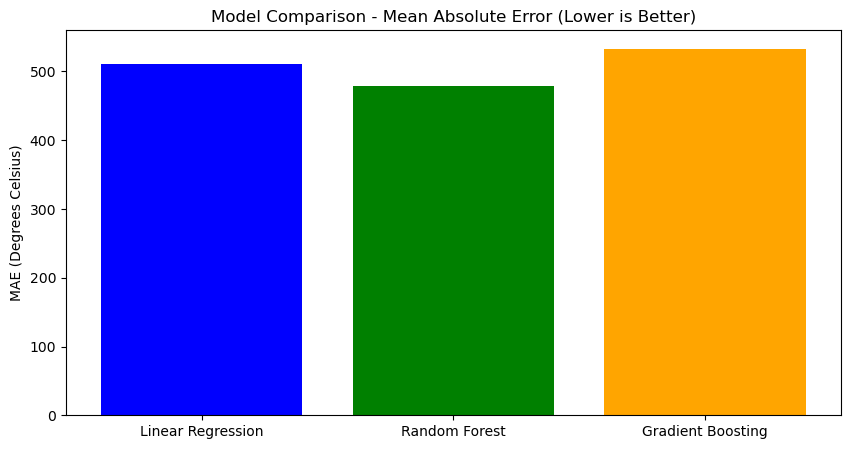

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
}

results = {}
predictions = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    results[name] = mae
    predictions[name] = preds
    print(f"{name} MAE: {mae:.2f}")

# Plot MAE Comparison
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange'])
plt.title('Model Comparison - Mean Absolute Error (Lower is Better)')
plt.ylabel('MAE (Degrees Celsius)')
plt.show()

## Visualize Best Model Forecast
We use the best performig model to visualize the validation fit.

Best Model: Random Forest


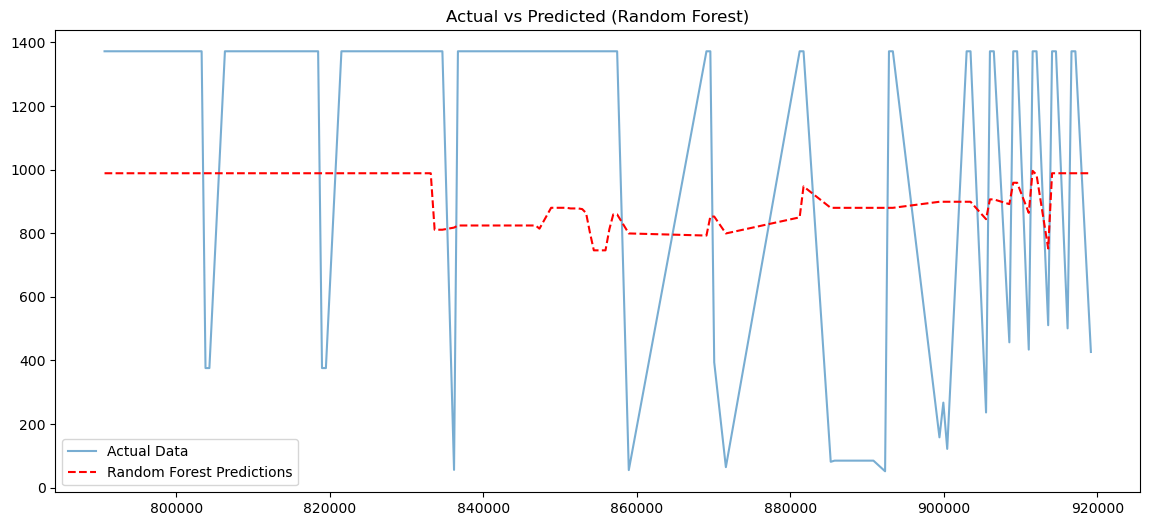

In [28]:
best_model_name = min(results, key=results.get)
print(f"Best Model: {best_model_name}")

plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Data', alpha=0.6)
plt.plot(y_test.index, predictions[best_model_name], label=f'{best_model_name} Predictions', linestyle='--', color='red')
plt.title(f'Actual vs Predicted ({best_model_name})')
plt.legend()
plt.show()